In [1]:
import numpy as np

In [2]:
# Constants
R = 8.314        # J/mol·K
T = 1600.0       # K
Omega = -1.0e4   # J/mol
beta = Omega / (R * T)  # ~ -0.751

# Mole fractions of B
XB = np.array([0.10, 0.20, 0.30, 0.40, 0.50])
XA = 1.0 - XB

# Activity of B
ln_gamma_B = beta * XA**2
ln_aB = ln_gamma_B + np.log(XB)
aB = np.exp(ln_aB)

In [3]:
# Gibbs–Duhem integration to get activity of A
ln_aA = np.zeros_like(XB)
for k in range(len(XB)):
    # Integration grid from XA=1 to current XA[k]
    X = np.linspace(1.0, XA[k], 200)  # descending
    XBfine = 1.0 - X
    # Interpolate ln_aB onto fine grid
    lnaBfine = np.interp(X, XA[::-1], ln_aB[::-1])
    # Compute derivative w.r.t X
    dlnaB_dX = np.gradient(lnaBfine, X)
    # Integrand from Gibbs-Duhem: dln aA = -(XB/XA) dln aB
    integrand = -(XBfine / X) * dlnaB_dX
    # Trapezoidal integration
    ln_aA[k] = np.trapz(integrand, X)  # ln aA(1)=0

aA = np.exp(ln_aA)

In [5]:
# Print table
print("XB      aB         aA")
for x, ab, aa in zip(XB, aB, aA):
    print(f"{x:4.2f}  {ab:7.4f}  {aa:7.4f}")

XB      aB         aA
0.10   0.0544   1.0000
0.20   0.1236   0.8642
0.30   0.2076   0.7263
0.40   0.3052   0.5895
0.50   0.4143   0.4583


In [6]:
R = 8.314
Tref = 298.0
T = 1200.0
dH298 = -180e3 # J/mol
dS298 = -120.0 # J/mol/K
a = 15.0; b = 2.0e-3; c = -1.0e5 # J/mol/K, J/mol/K^2, J*K/mol

In [7]:
# dH(T) = dH298 + a(T-298) + 0.5*b(T^2-298^2) + c*(-1/T + 1/298)
dH_T = dH298 + a*(T-Tref) + 0.5*b*(T**2 - Tref**2) + c*(-1.0/T + 1.0/Tref)

# dS(T) = dS298 + a ln(T/298) + b(T-298) + c*(-1/(2T^2) + 1/(2*298^2))
dS_T = dS298 + a*np.log(T/Tref) + b*(T-Tref) + c*(-1.0/(2*T**2) + 1.0/(2*Tref**2))

dG_T = dH_T - T*dS_T
K = np.exp(-dG_T/(R*T))

In [10]:
# print("dH(1200K) [kJ/mol] =", dH_T/1000)
# print("dS(1200K) [J/mol/K] =", dS_T)
print("dG(1200K) [kJ/mol] =", dG_T/1000)
print("K(1200K) =", K)

dG(1200K) [kJ/mol] = -47.97556284879903
K(1200K) = 122.57370197901348


In [11]:
# Adiabatic estimate: Q_release approx -dH_T; dT approx Q_release / C_eff
Ceff = 45.0 # J/K
DeltaT = (-dH_T)/Ceff
print("Adiabatic dT [K] approx", DeltaT)

Adiabatic dT [K] approx 3674.912025254785


In [17]:
import matplotlib.pyplot as plt

In [12]:
R = 8.314
Omega = 8e3
XB = 0.30
XA = 1.0 - XB

dHvA = 35e3; dHvB = 50e3
C_A = 20.0; C_B = 18.0 # arbitrary constants to set pressure scale

In [18]:
def p0(T, dH, C): # pure-component vapor pressure (arbitrary units)
    return np.exp(-dH/(R*T) + C)

def gamma_A(T): return np.exp((Omega/(R*T))*XB**2)
def gamma_B(T): return np.exp((Omega/(R*T))*XA**2)

T = np.linspace(350, 450, 201)
P = gamma_A(T)*XA*p0(T,dHvA,C_A) + gamma_B(T)*XB*p0(T,dHvB,C_B)

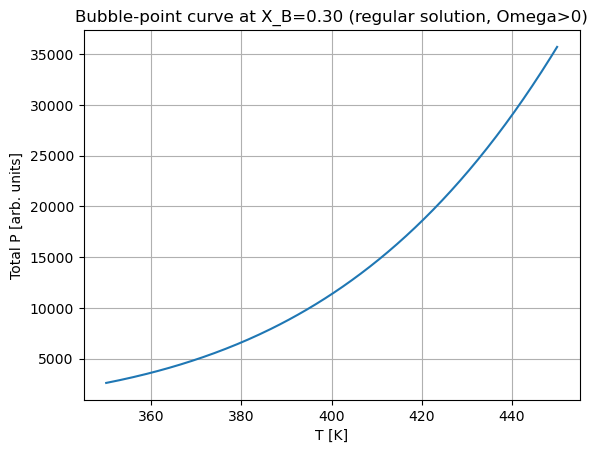

In [19]:
plt.plot(T, P)
plt.xlabel('T [K]'); plt.ylabel('Total P [arb. units]')
plt.title('Bubble-point curve at X_B=0.30 (regular solution, Omega>0)')
plt.grid(True); plt.show()